In [8]:
# @itsvenu_
# UpperConfidenceBound - RL

# multi-armed bandit problem

![UCB](UCB.png)

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt, log

In [9]:
# which ad attracts more people of these 10 with UCB
# show each ad online once, if user clicks on ad=1; if not=0
# CTR - Click Through Rate

dat = pd.read_csv('../../data/Ads_CTR_Optimisation.csv')
dat.head()

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0


In [10]:
dat.shape

(10000, 10)

In [11]:
# Implement UCB
# select an ad with max(UCB)

N=10000 #users
d = 10 #ads

ads_selected = []
numbers_of_selections = [0] * d #how many times an ad is selected
sums_of_rewards = [0] * d # rewards each ad got
total_reward = 0

In [15]:
# loop over each user - all 10k users
#           loop over each ad - all 10 ads

for n in range(0, N):
    ad = 0
    max_upper_bound = 0
    for i in range(0, d):
        if (numbers_of_selections[i]) > 0:
            average_reward = sums_of_rewards[i]/numbers_of_selections[i]
            delta_i = sqrt(3/2 * log(n+1)/numbers_of_selections[i])
            upper_bound = average_reward + delta_i
        
        else:
            upper_bound = 1e400
        
        if(upper_bound > max_upper_bound):
            max_upper_bound = upper_bound
            ad = i
    
    ads_selected.append(ad)
    numbers_of_selections[ad] = numbers_of_selections[ad]+1
    reward = dat.values[n, ad]
    sums_of_rewards[ad] = sums_of_rewards[ad] + reward
    total_reward = total_reward + reward

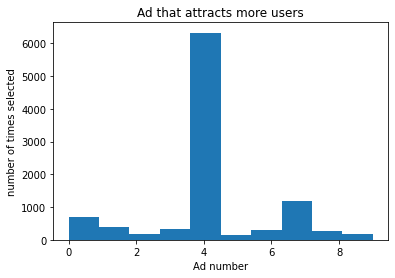

In [21]:
plt.hist(ads_selected)
plt.xlabel('Ad number')
plt.ylabel('number of times selected')
plt.title('Ad that attracts more users')
plt.show()